# WELCOME TO THE NOTEBOOK
---

### Exploratory vs Confirmatory Data Analysis
In this project, we are going to learn about two important data analysis methods **EDA** (Exploratory Data Analysis) and **CDA** (Confirmatory Data Analysis).


### Task 1: What Is Exploratory Data Analysis (EDA)?

Definition: EDA or Exploratory Data Analysis is one of the data analysis methods where we use different statistical summaries and graphical representations to perform initial investigations on the data to discover interesting patterns, spot anomalies, and overall for a better understanding of our data.

Importing Modules

In [ ]:
# Pandas Module
import pandas as pd

# Data Visualization Module
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

# Setting some default settings
pd.set_option('mode.chained_assignment',None)
pyo.init_notebook_mode()

Let's load our dataset

In [ ]:
df = pd.read_csv('dataset.csv',engine='python',encoding='unicode_escape')

Checking the data size

In [ ]:
df.shape

Checking the data

In [ ]:
df.head()

### Task 2: EDA - Where to start?

In this task, we are going to talk about How to start our exploration. 

    Different column data types
    How are the columns related
    What are the different information in our data
    Make a list of the information and start from the first 



Now let's start with checking the column data types 

In [ ]:
df.dtypes

Now let's talk about what type of information do we have in this data

### In our data, we have the following information:
    
    Time Information (Order Data)
    Customer Information (Customer Name)
    Place Information (State name)
    Hierarchical Information about the products (Category, Sub-category, Product Name)
    Sale Information (sales, profit, quantity)

<img width = 200px, height = 200px,  src='images/information cube.png'>
now let's start our exploration

### Task 3: Data Exploration: Time Information 

In [ ]:
df.head()

What is the timespan of our data?

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])
from_=df['Order Date'].min()
to_=df['Order Date'].max()
print("We have information from ",from_,"to ",to_)


Now let's sort our data by the date

In [ ]:
df=df.sort_values(by='Order Date')
df.head()

Some data preparation: let's extract year, month, and day from the Order Date column

In [ ]:
df['Year']=pd.DatetimeIndex(df['Order Date']).year
df['Month']=pd.DatetimeIndex(df['Order Date']).month
df['Day']=pd.DatetimeIndex(df['Order Date']).day

df.head()


Profit gained over time by different product categories

In [ ]:
df1=df.groupby(['Year','Category']).agg({'Profit':'sum'}).reset_index()
df1.head()

Visualizing the results using a line chart

In [ ]:
px.line(df1,x='Year',y='Profit',color='Category')

Exercise: Analyse the monthly profits gained from sales of different product categories. use a linechart to visualize your results. 

In [ ]:
df2=df.groupby(['Year','Month','Category']).agg({'Profit':'sum'}).reset_index()
df2['Date']=df2.Year.astype(str)+'-'+df2.Month.astype(str)+'-01'
df2.head()

### Data Exploration: Customer Aspect

let's see how many unique costumers do we have

In [ ]:
customer=list(df['Customer Name'].unique())
len(customer)

let's see the yearly change in number of unique customers

In [ ]:
df3=df.groupby('Year').agg({'Customer Name':'nunique'}).reset_index()
df3.rename(columns={'Customer Name':'Customer Count'},inplace=True)
df3.head()

visualizing the result

In [ ]:
px.line(df3,x='Year',y='Customer Count')

Top 10 customers who brought the highest profit 

In [ ]:
df4=df.groupby('Customer Name').agg({'Profit':'sum'}).reset_index()
df5=df4.sort_values(by='Profit',ascending=False).head(10)
df5

In [ ]:
px.bar(df5,x='Customer Name',y='Profit')

### Task 4: Data Exploration: Place (location) Aspect

Let's analyze the profits gained in different states in the US

In [ ]:
df6=df.groupby('State').agg({'Profit':'sum'}).reset_index()
df6

### Let's create a choropleth map 
Plotly uses abbreviated two-letter postal codes for state locations so it will be necessary to create a dictionary that contains conversions of the full names of states into abbreviations.

In [ ]:
state_codes = {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'
}

let's map the abbreviated two-letter postal codes to the State column

In [ ]:
df6['State']=df6['State'].map(state_codes)
df6

In [ ]:
px.choropleth(df6,locations='State',locationmode='USA-states',scope='usa',color='Profit',title=
              'Profit gained in different states',color_continuous_scale='blugrn')

Exercise: Create a choropleth map to visualize the profit gained by selling technology(Category=technology) products in different states. 

In [ ]:
df7=df.groupby(['Category','State']).agg({'Profit':'sum'}).reset_index()
df8=df7[df7.Category=='Technology']
df8.State=df8.State.map(state_codes)
px.choropleth(df8,locations='State',locationmode='USA-states',color='Profit',scope='usa',color_continuous_scale='blugrn')

### Task 5: Data Exploration - Hierarchical Information about the products

In [ ]:
df9=df.groupby(['Category','Sub-Category']).agg({'Profit':'sum'}).reset_index()
df9['Sales']='Any'
df9=df9[df9.Profit>0]
df9

In [ ]:
px.sunburst(df9,path=['Sales','Category','Sub-Category',],values='Profit')

In [ ]:
px.treemap(df9,path=['Sales','Category','Sub-Category'],values='Profit')

### Task 6: Data Exploration: Product Sales information (Sales, Quantity, Profit)

In [ ]:
df.head()

Distribution Analysis on **Quantity** column 

Let's check the statistical summary of the column

In [ ]:
df.Quantity.describe()

In [ ]:
px.histogram(df,x='Quantity')

In [ ]:
px.box(df,y='Quantity',x='Category',color='Year')

Exercise: Apply distribution analysis using boxplot to the **Profit** column. using statistical summary and a box plot. 

In [ ]:
df.Profit.describe()

In [ ]:
px.box(df,y='Profit')

### Task 7: What Is Confirmatory Data Analysis (CDA)? 

By definition, Confirmatory Data Analysis is the process of using statistical summary and graphical representations to evaluate the validity of an assumption about the data at hand.

We have the following assumption about our data, and we are going to use different exploration techniques we learned in the previous tasks to validate them. 

    Assumption 1 - Every summer technology products have the highest sale quantity compared to other product categories.
    Assumption 2- In New York, there are many big companies, therefore, office supplies product has 
    the highest sale quantity compared to other big states such as Texas, Illinois, and California. 


Assumption 1 - Every summer technology products have the highest sale quantity compared to other product categories.

In [ ]:
seasons = {
    1 : "Winter",
    2 : "Spring",
    3 : "Summer",
    4 : "Fall"
}

Creating **Season** column

In [ ]:
df['Season']=(df.Month.astype(int)%12//3+1).map(seasons)
df.head()

Extracting data related to summer every year

In [ ]:
df_summer=df[df.Season=='Summer']
df_summer.head()

Aggregating data based on Year, Category, and Season columns and summing up the Quantity

In [ ]:
df_agg=df_summer.groupby(['Year','Category']).agg({'Quantity':'sum'}).reset_index()
df_agg

Let's visualize our result using a grouped bar chart

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



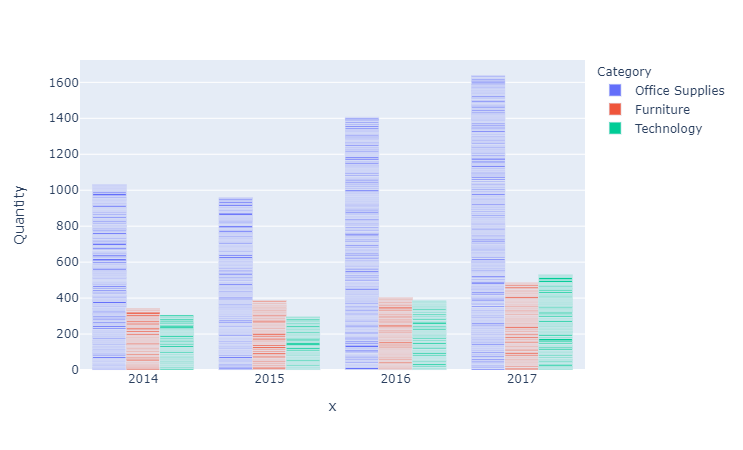

In [41]:
px.bar(df_summer,x=df_summer.Year.astype(str),y='Quantity',color='Category',barmode='group')

Exercise: Use the analytical techniques that you've learned during the course to validate the following assumption:
        
        Assumption 2- In New York, there are many big companies, therefore, office supplies 
        product has the highest sale quantity compared to other big states such as Texas, Illinois, and California. 

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



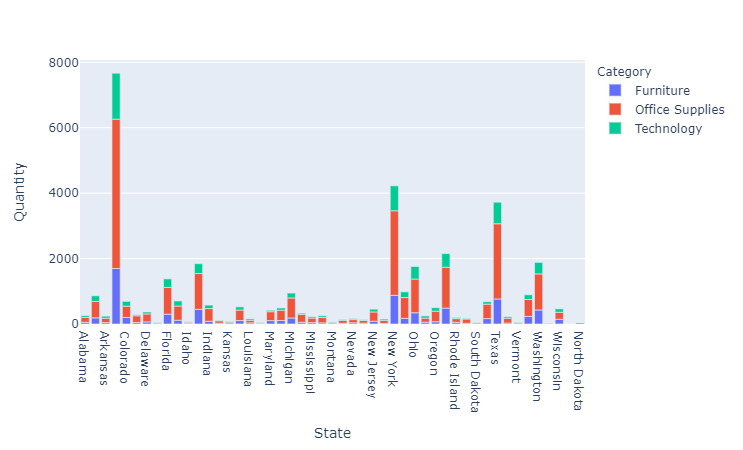

In [44]:
df_agg=df.groupby(['State','Category']).agg({'Quantity':'sum'}).reset_index()
px.bar(df_agg,x='State',y='Quantity',color='Category')



---

<img align=left width=20px height=20px src="images/luck.png">**Good Luck!**</img>